[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%203/Leçon_3_Demo_replie1D.ipynb)

# ELE8812 - Représentation fréquentielle

## Démo : Démonstration du phénomène de repliement, cadre 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,16)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


In [3]:
# charger l'ecg
ecg = scipy.io.loadmat('Repo/Data/ecg_ref.mat')

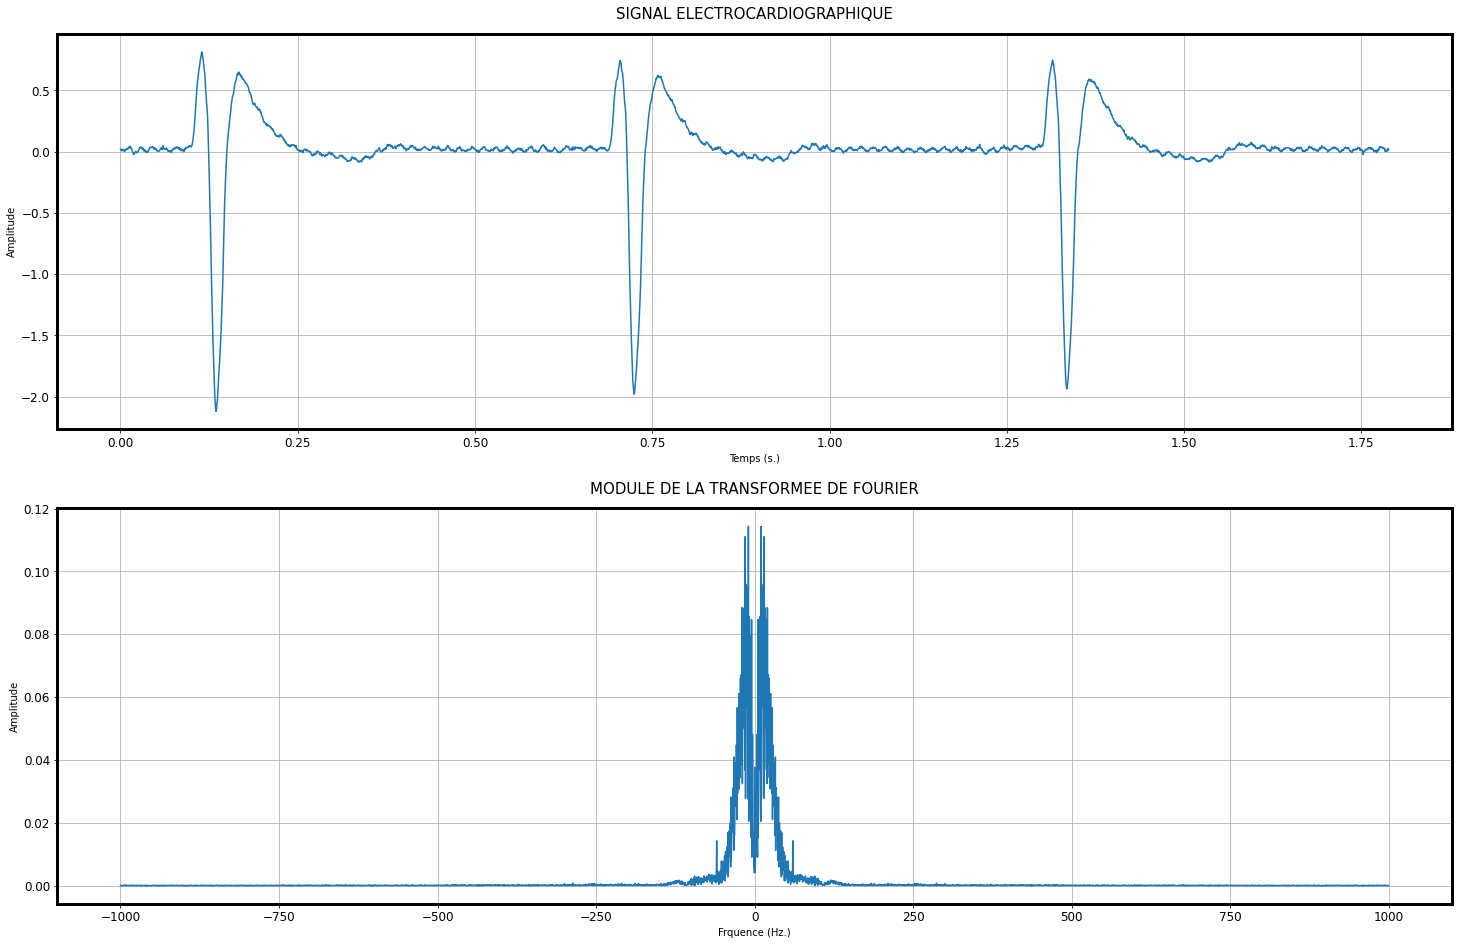

In [4]:
x = ecg['ecg_ref'][0:3578,0]
fe = 2000.0
Te = 1 / fe
N = len(x)
Nx = 4000
t = np.arange(0,N) * Te

plt.subplot(211)
plt.plot(t,x)
plt.grid('on')
plt.xlabel('Temps (s.)')
plt.ylabel('Amplitude')
plt.title('SIGNAL ELECTROCARDIOGRAPHIQUE')

X = Te * np.fft.fft(x,n=4000)

#nu = (0:Nx-1)/(Nx*Te);
nu = (np.arange(- Nx / 2,Nx/2 )) / (Nx * Te)

plt.subplot(212)
plt.plot(nu,np.fft.fftshift(np.abs(X)))
plt.grid('on')
plt.xlabel('Frquence (Hz.)')
plt.ylabel('Amplitude')
plt.title('MODULE DE LA TRANSFORMEE DE FOURIER')
plt.show()

## Choix de la fréquence d'échantillonage

In [5]:
slider = widgets.IntSlider(min=1, max=150, step=1, description='f échantillons:', readout=True,)
display(slider)

IntSlider(value=1, description='f échantillons:', max=150, min=1)

## Echantillonage et module de la transformée de Fourier du signal échantilloné

In [6]:
def shift(x, shiftsize):
    """ 
    Décalage d'un vecteur de SHIFTSIZE éléments, avec remplissage des trous par des zéros.
    Si SHIFTSIZE > 0, le décalage se fait vers la droite ou vers le bas.
    
    Si SHIFTSIZE < 0, le décalage se fait vers la gauche ou vers le haut.
    """
    A = x.shape
    z = np.zeros(np.abs(shiftsize))
    aux = np.concatenate((z,x,z))
    y = np.roll(aux,shiftsize)
    
    return y[np.abs(shiftsize):np.abs(shiftsize)+A[0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


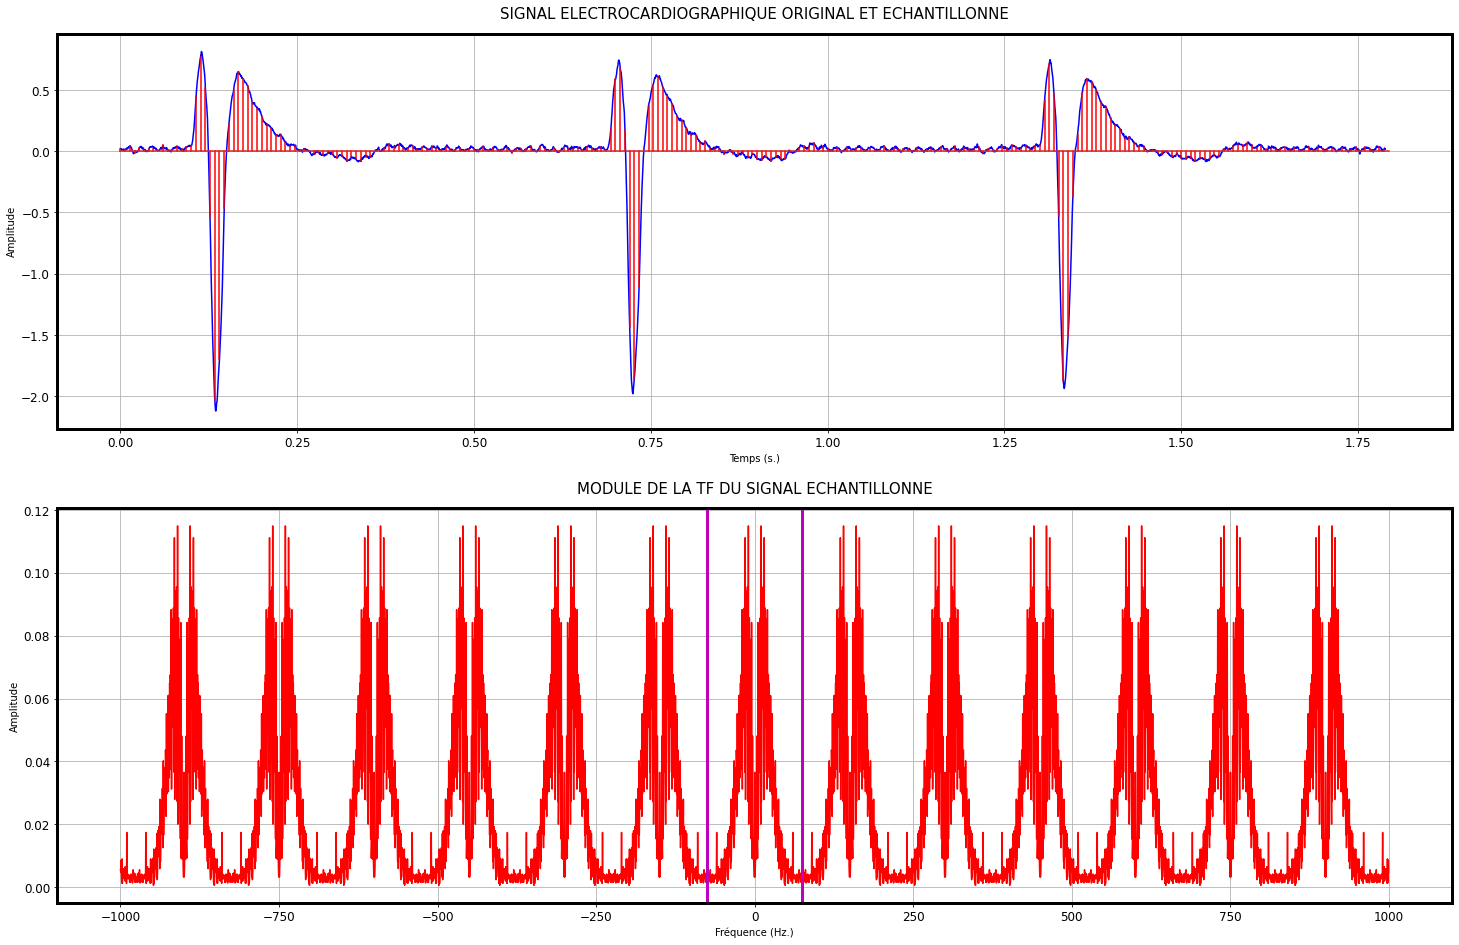

In [9]:
fey = slider.value

# Construction de la TF du signal échantillonné
Ney = int(fey * (Nx * Te))

Y = -np.fft.fftshift(X)

for shiftsize in np.arange(0,Nx+Ney,Ney):
    Y = Y + shift(np.fft.fftshift(X), int(shiftsize))
    Y = Y + shift(np.fft.fftshift(X), -int(shiftsize))
    
# Construction du signal échantillonné
Ye = Y[int((Nx-Ney)/2):int((Nx+Ney)/2)]
ye = np.real(np.fft.ifft(np.fft.fftshift(Ye))) * fey
te = np.arange(0,(N-1)*Te+1/fey,1/fey)

plt.subplot(211);
plt.plot(t,x,'b')
plt.stem(te,ye[0:len(te)],'r','none')
plt.grid('on')
plt.xlabel('Temps (s.)')
plt.ylabel('Amplitude')
plt.title('SIGNAL ELECTROCARDIOGRAPHIQUE ORIGINAL ET ECHANTILLONNE')

plt.subplot(212);
plt.plot(nu,np.abs(Y),'r')
lims=plt.gca().get_ylim()
plt.plot(np.array([- fey / 2,- fey / 2]),lims,'m',linewidth=3)
plt.plot(np.array([fey / 2,fey / 2]),lims,'m',linewidth=3)
plt.ylim(lims)
plt.grid('on')
plt.xlabel('Fréquence (Hz.)')
plt.ylabel('Amplitude')
plt.title('MODULE DE LA TF DU SIGNAL ECHANTILLONNE')
plt.show()


## Reconstruction du signal

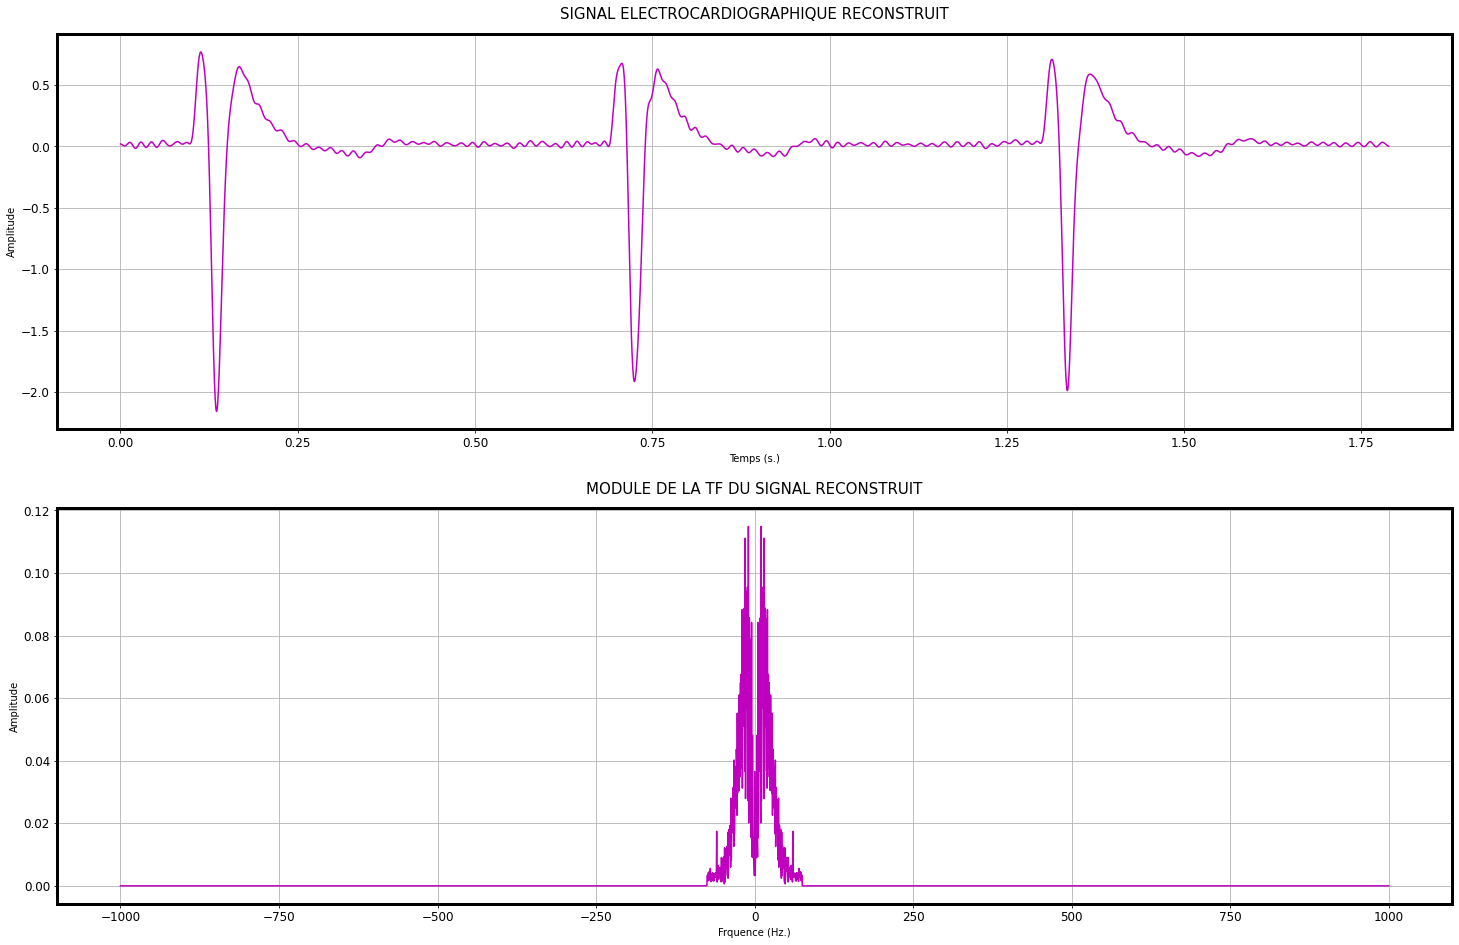

In [10]:
# Reconstruction du signal
Yr = np.zeros(Y.shape[0],dtype='complex128')
Yr[int((Nx-Ney)/2):int((Nx+Ney)/2)] = Ye
yr = np.real(np.fft.ifft(np.fft.fftshift(Yr))) * fe

plt.subplot(211);
plt.plot(t,yr[0:N],'m')
plt.grid('on')
plt.xlabel('Temps (s.)')
plt.ylabel('Amplitude')
plt.title('SIGNAL ELECTROCARDIOGRAPHIQUE RECONSTRUIT')

plt.subplot(212);
plt.plot(nu,np.abs(Yr),'m')
plt.grid('on')
plt.xlabel('Frquence (Hz.)')
plt.ylabel('Amplitude')
plt.title('MODULE DE LA TF DU SIGNAL RECONSTRUIT')
plt.show()

## Comparaison signal original et reconstruit

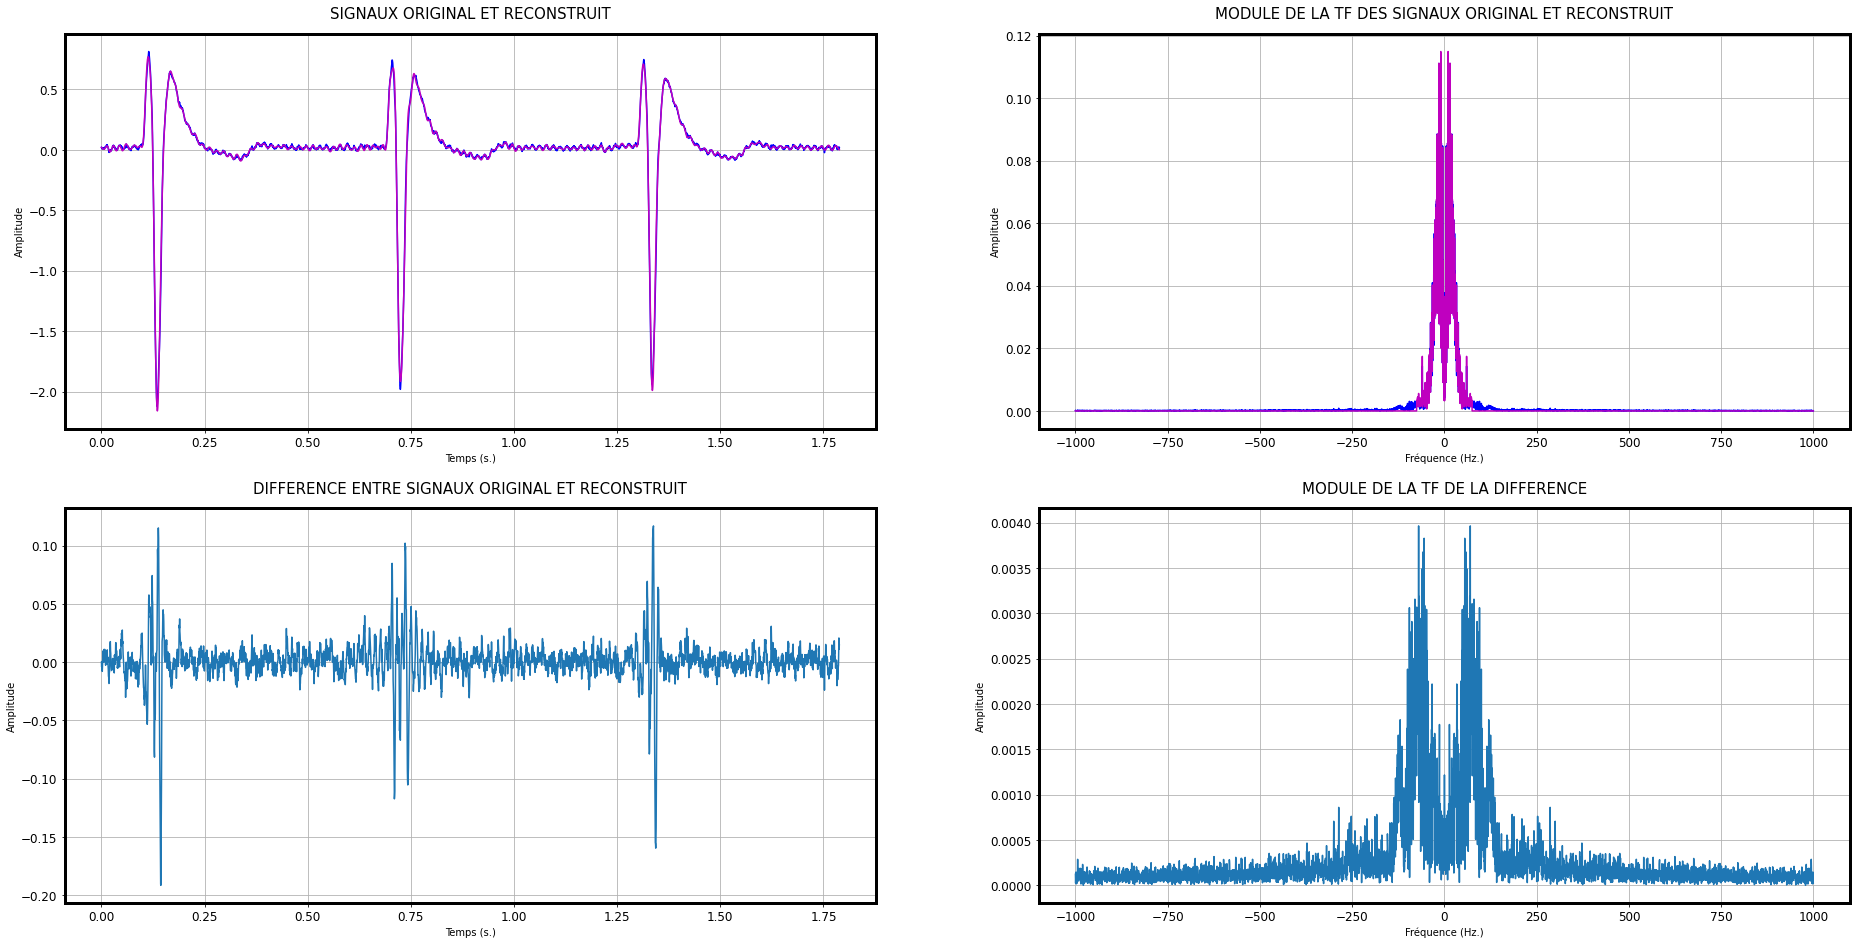

In [11]:
plt.rcParams['figure.figsize'] = (32,16)

plt.subplot(221);
plt.plot(t,x,'b')
plt.plot(t,yr[0:N],'m')
plt.grid('on')
plt.xlabel('Temps (s.)')
plt.ylabel('Amplitude')
plt.title('SIGNAUX ORIGINAL ET RECONSTRUIT')

plt.subplot(222);
plt.plot(nu,np.abs(np.fft.fftshift(X)),'b')
plt.plot(nu,np.abs(Yr),'m')
plt.grid('on')
plt.xlabel('Fréquence (Hz.)')
plt.ylabel('Amplitude')
plt.title('MODULE DE LA TF DES SIGNAUX ORIGINAL ET RECONSTRUIT')

plt.subplot(223);
plt.plot(t,x - yr[0:N])
plt.grid('on')
plt.xlabel('Temps (s.)')
plt.ylabel('Amplitude')
plt.title('DIFFERENCE ENTRE SIGNAUX ORIGINAL ET RECONSTRUIT')

plt.subplot(224);
plt.plot(nu,np.abs(np.fft.fftshift(X) - Yr))
plt.grid('on')
plt.xlabel('Fréquence (Hz.)')
plt.ylabel('Amplitude')
plt.title('MODULE DE LA TF DE LA DIFFERENCE')

plt.show()